In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# Nhớ tải file dữ liệu heights.csv về thư mục máy tính của bạn, và sửa đường dẫn sau cho đúng
df=pd.read_csv('E:/ML/heights.csv')

In [3]:
df.head()

,sex,height
0,Male,75.0
1,Male,70.0
2,Male,68.0
3,Male,74.0
4,Male,61.0


<function matplotlib.pyplot.show(close=None, block=None)>

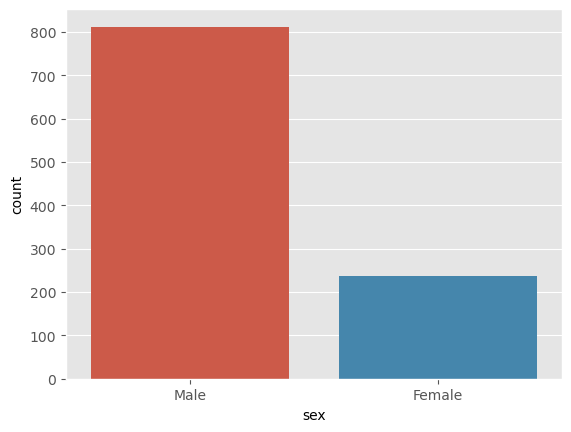

In [4]:
plt.figure()
sns.countplot(x="sex", data=df)
plt.show

In [5]:
df2 = df
df2['count']=range(df.shape[0])
df2.head()

,sex,height,count
0,Male,75.0,0
1,Male,70.0,1
2,Male,68.0,2
3,Male,74.0,3
4,Male,61.0,4


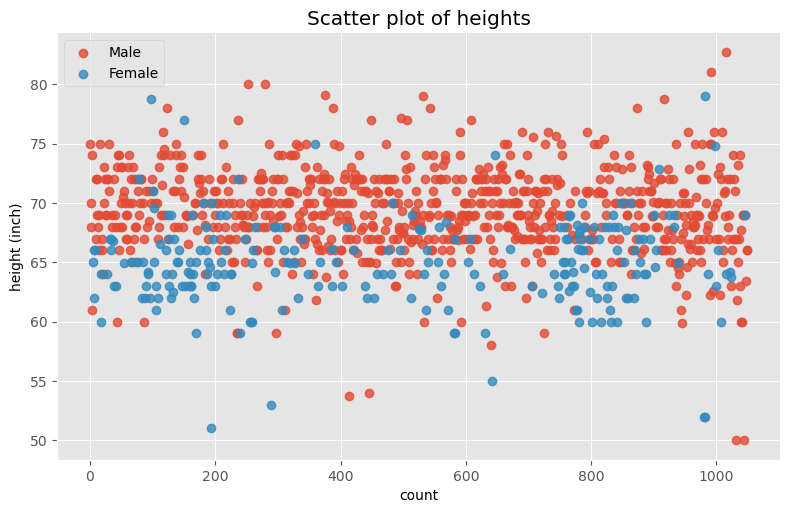

In [6]:
#tạo một biểu đồ scatter plot với dữ liệu từ DataFrame df2. Nó phân loại các điểm dữ liệu theo giới tính và không có đường hồi quy tuyến tính. Chú thích, tiêu đề và nhãn trục được thêm vào để cung cấp thông tin cho biểu đồ.
sns.lmplot( x="count", y="height", data=df2, hue='sex', legend=False, fit_reg=False, aspect=1.6)
plt.legend(loc='upper left')
plt.title('Scatter plot of heights')
plt.ylabel('height (inch)')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7668\4013039636.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'],bins=20)


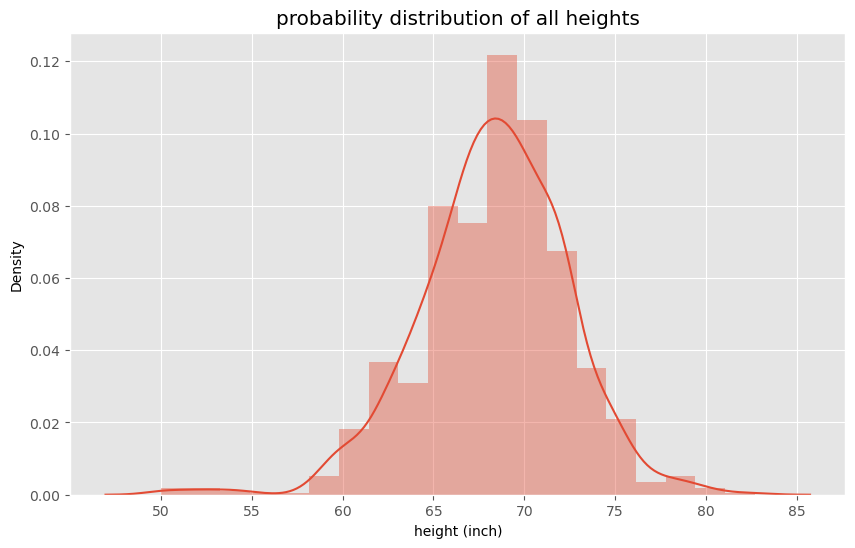

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['height'],bins=20)
plt.title('probability distribution of all heights')
plt.xlabel('height (inch)')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7668\2335440942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.sex=='Male']['height'],bins=None, hist=False, label = 'Male')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7668\2335440942.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

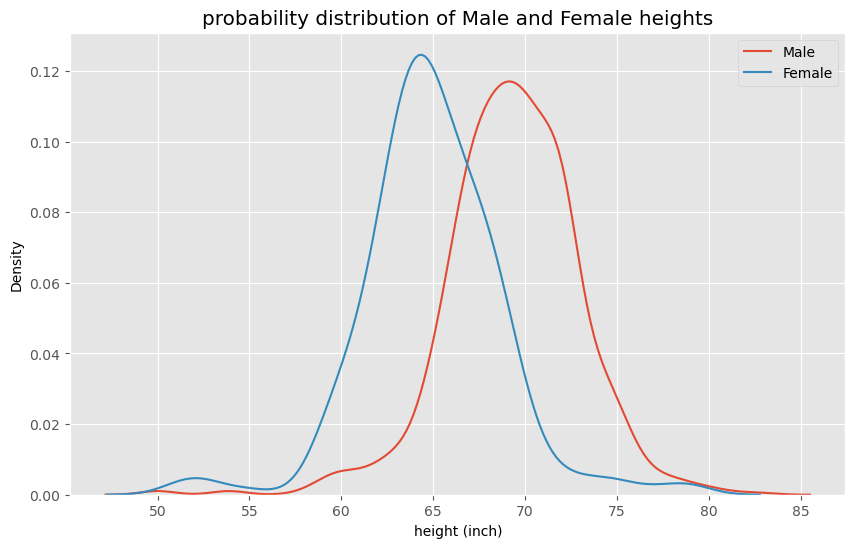

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.sex=='Male']['height'],bins=None, hist=False, label = 'Male')
plt.title('probability distribution of Male and Female heights')
sns.distplot(df[df.sex=='Female']['height'],bins=None, hist = False, label = 'Female')
plt.legend()
plt.xlabel('height (inch)')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['sex'].values)
pd.value_counts(y)

1    812
0    238
dtype: int64

In [12]:
X = df['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train = X_train.values.reshape(X_train.shape[0],1)
X_test = X_test.values.reshape(X_test.shape[0],1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
knn.score(X_test, y_test)

0.8507936507936508

In [14]:
print(confusion_matrix(y_pred, y_test))

[[ 36  12]
 [ 35 232]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.51      0.61        71
           1       0.87      0.95      0.91       244

    accuracy                           0.85       315
   macro avg       0.81      0.73      0.76       315
weighted avg       0.84      0.85      0.84       315



In [16]:
P_AB = y_test[y_pred==1].sum()/np.sum(y_pred)

In [17]:
P_AB

0.8689138576779026

In [18]:
P_A = (y_test[y_pred==1].sum() + y_test[y_pred==0].sum())/len(y_test)

In [20]:
P_A = (y_test[y_pred==1].sum() + y_test[y_pred==0].sum())/len(y_test)

In [21]:
P_A

0.7746031746031746

In [22]:
P_B = np.sum(y_pred)/len(y_pred)

In [23]:
P_B

0.8476190476190476

In [24]:
(P_B*P_AB)/P_A

0.9508196721311476

In [25]:
P_BA = y_pred[y_test==1].sum()/(y_test[y_pred==1].sum() + y_test[y_pred==0].sum())

In [26]:
P_BA

0.9508196721311475